# MEE4006 CFD Lab
# Exercise 3

# This code solves the 1D heat conduction equation with fixed temperatures at both ends (Dritchlet type), without sources

## Governing equation
$\frac{\partial }{\partial x} \left ( k \frac{\partial T}{\partial x} \right ) + \frac{\partial }{\partial y} \left ( k \frac{\partial T}{\partial y} \right )= 0 $

## Domain and material
$x,y \in [0,1]$

$k_{Aluminium} = 235.0 W/K $

## Boundary conditions
At $x=0, T_{left} = 293 K$ 

At $x=1, T_{right} = 293 K$

At $y=0, T_{bottom} = 373 K$ 

At $y=1, T_{top} = 293 K$

Heat flux can be added to any of the walls


## Grid 

Find the optimal number of points needed to obtain grid converged solution.

## Numerical method

We implement the spacing marching method in space, using second-order central difference.

$ k \frac{\partial^2 T}{\partial x^2} = k \frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$


$ k \frac{\partial^2 T}{\partial y^2} = k \frac{T_{i,j+1}-2T_{i,j}+T_{j-1,j}}{\Delta y^2}$

Since, 

$ k \frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2} + k \frac{T_{i,j+1}-2T_{i,j}+T_{j-1,j}}{\Delta y^2} = 0 $

$T_{i,j} = \frac{\Delta x^2+ \Delta y^2}{\Delta x^2 \Delta y^2}\left [ \frac{T_{i+1,j}+T_{i-1,j}}{2\Delta x^2} + \frac{T_{i,j+1}+T_{i,j-1}}{2\Delta y^2} \right ]$


## Error

We find the L2-norm of the error i.e., the rate at which the solution changes

$ L_2 Norm = \sqrt{ \Sigma x_i^2 } $


# Exercise
## 1. Generate the line plot, and the contour plot, for T_left=150K, T_right = 500K
## 2. Report the convergence if we take 201 points, how many iterations does it take to converge to an error of 1e-2
## 3. Comment on the effect of grid size on the rate of convergence

In [2]:
import numpy as np # math library
import matplotlib.pyplot as plt # library for plotting
np.set_printoptions(precision=10) # sets the prcision for numbers - while printing

In [66]:
# Define parameters
N = 21
max_error = 1e-3 # the error at which the iteration should stop
max_iter = 1000

T_top = 293.0
T_bottom = 373.0
T_left = 293.0
T_right = 293.0

heat_flux=50.0 # W/m2
k_al = 235.0
T_heatflux = heat_flux / k_al

heatflux_bdry = True # switch to on/off heat flux boundary

T_guess = 293.0

In [78]:
# create grid from [0,N-1]
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 
y = np.linspace(0.0, 1.0, N, endpoint=True, dtype=np.float64) 

X, Y = np.meshgrid(x,y) # create a 2D grid for plotting


dx = x[1]-x[0] # here we are assuming uniform grid
dy = y[1]-y[0]

fac = (dx*dx*dy*dy)/(dx*dx + dy*dy)

print('dx,dy,fac = ',dx,dy, fac)
x,y

dx,dy,fac =  0.05 0.05 0.0012500000000000002


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))

In [97]:
# Create the data arrays

# https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
# https://numpy.org/doc/stable/reference/generated/numpy.ndarray.fill.html
T = np.zeros((N,N), dtype=np.float64)
T_old = np.zeros((N,N), dtype=np.float64)

T.fill(T_guess) # set a single value to the 2D array
T_old.fill(T_guess)

In [58]:
T, T.shape, T_old.shape

(array([[300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300., 300., 300.],
        [300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
         300., 300., 300., 300., 300., 300., 300., 300.

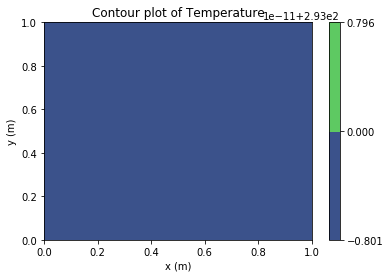

In [80]:
# plot initial condition
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

In [70]:
T[:][N-1] # slice view example

array([293., 293., 293., 293., 293., 293., 293., 293., 293., 293., 293.,
       293., 293., 293., 293., 293., 293., 293., 293., 293., 293.])

In [98]:
for k in range(0,max_iter):
    T_old = T.copy() # copy one array to another
    
    # set BCs
    # Bottom : j=0
    # Top : j=N-1
    # Right : i=N-1
    # Left : i=0
    
    T_old[0][:]=T_left # i=0
    T_old[N-1][:]=T_right # i=N-1
    
    T_old[:][N-1]=T_top # j=N-1
    T_old[:][0]=T_bottom # j=0

    # Top heat flux
    # http://jullio.pe.kr/fluent6.1/help/html/ug/node216.htm
    if(heatflux_bdry):
        T_old[:][N-1]= T_heatflux + T_old[:][N-2]
    

    # apply the difference formula
    for i in range(1,N-1): # note excludes N-1
        for j in range(1,N-1): # note excludes N-1
            T[i][j] = fac* ( (T_old[i+1][j]+T_old[i-1][j])/(2.0*dx*dx)  + (T_old[i][j+1]+T_old[i][j-1])/(2.0*dy*dy)) 

    # set BCs        
    T[0][:]=T_left
    T[N-1][:]=T_right
    
    T[:][N-1]=T_top
    T[:][0]=T_bottom
    
    # Top heat flux
    if(heatflux_bdryT):
        [:][N-1]= T_heatflux + T[:][N-2]
    
    # compute error
    # https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
    # https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
    error=np.linalg.norm(np.subtract(T,T_old),2) 
    
    if(error >= max_error):
        print('Iteration = ',k,'Error = %10.8f' % error)
    else:
        print('Iteration = ',k,'Error = %10.8f' % error)
        print('Converged')
        break
    

Iteration =  0 Error = 87.17859551
Iteration =  1 Error = 47.06876150
Iteration =  2 Error = 33.60403998
Iteration =  3 Error = 26.51111215
Iteration =  4 Error = 22.06069277
Iteration =  5 Error = 18.97781293
Iteration =  6 Error = 16.70149817
Iteration =  7 Error = 14.94380891
Iteration =  8 Error = 13.54082304
Iteration =  9 Error = 12.39194575
Iteration =  10 Error = 11.43181832
Iteration =  11 Error = 10.61602337
Iteration =  12 Error = 9.91325756
Iteration =  13 Error = 9.30078719
Iteration =  14 Error = 8.76168027
Iteration =  15 Error = 8.28305178
Iteration =  16 Error = 7.85491276
Iteration =  17 Error = 7.46939325
Iteration =  18 Error = 7.12020394
Iteration =  19 Error = 6.80225500
Iteration =  20 Error = 6.51138073
Iteration =  21 Error = 6.24413712
Iteration =  22 Error = 5.99765069
Iteration =  23 Error = 5.76950402
Iteration =  24 Error = 5.55764791
Iteration =  25 Error = 5.36033318
Iteration =  26 Error = 5.17605720
Iteration =  27 Error = 5.00352149
Iteration =  28 Er

Iteration =  344 Error = 0.15274220
Iteration =  345 Error = 0.15155810
Iteration =  346 Error = 0.15038316
Iteration =  347 Error = 0.14921730
Iteration =  348 Error = 0.14806045
Iteration =  349 Error = 0.14691255
Iteration =  350 Error = 0.14577352
Iteration =  351 Error = 0.14464330
Iteration =  352 Error = 0.14352182
Iteration =  353 Error = 0.14240901
Iteration =  354 Error = 0.14130480
Iteration =  355 Error = 0.14020913
Iteration =  356 Error = 0.13912193
Iteration =  357 Error = 0.13804313
Iteration =  358 Error = 0.13697268
Iteration =  359 Error = 0.13591050
Iteration =  360 Error = 0.13485654
Iteration =  361 Error = 0.13381072
Iteration =  362 Error = 0.13277299
Iteration =  363 Error = 0.13174328
Iteration =  364 Error = 0.13072154
Iteration =  365 Error = 0.12970769
Iteration =  366 Error = 0.12870169
Iteration =  367 Error = 0.12770346
Iteration =  368 Error = 0.12671296
Iteration =  369 Error = 0.12573011
Iteration =  370 Error = 0.12475486
Iteration =  371 Error = 0.1

Iteration =  653 Error = 0.01371618
Iteration =  654 Error = 0.01360952
Iteration =  655 Error = 0.01350368
Iteration =  656 Error = 0.01339867
Iteration =  657 Error = 0.01329447
Iteration =  658 Error = 0.01319109
Iteration =  659 Error = 0.01308851
Iteration =  660 Error = 0.01298672
Iteration =  661 Error = 0.01288573
Iteration =  662 Error = 0.01278552
Iteration =  663 Error = 0.01268610
Iteration =  664 Error = 0.01258744
Iteration =  665 Error = 0.01248955
Iteration =  666 Error = 0.01239243
Iteration =  667 Error = 0.01229606
Iteration =  668 Error = 0.01220043
Iteration =  669 Error = 0.01210556
Iteration =  670 Error = 0.01201141
Iteration =  671 Error = 0.01191801
Iteration =  672 Error = 0.01182532
Iteration =  673 Error = 0.01173336
Iteration =  674 Error = 0.01164212
Iteration =  675 Error = 0.01155158
Iteration =  676 Error = 0.01146175
Iteration =  677 Error = 0.01137261
Iteration =  678 Error = 0.01128417
Iteration =  679 Error = 0.01119642
Iteration =  680 Error = 0.0

Iteration =  959 Error = 0.00125798
Iteration =  960 Error = 0.00124820
Iteration =  961 Error = 0.00123849
Iteration =  962 Error = 0.00122886
Iteration =  963 Error = 0.00121930
Iteration =  964 Error = 0.00120982
Iteration =  965 Error = 0.00120041
Iteration =  966 Error = 0.00119107
Iteration =  967 Error = 0.00118181
Iteration =  968 Error = 0.00117262
Iteration =  969 Error = 0.00116350
Iteration =  970 Error = 0.00115445
Iteration =  971 Error = 0.00114547
Iteration =  972 Error = 0.00113656
Iteration =  973 Error = 0.00112772
Iteration =  974 Error = 0.00111895
Iteration =  975 Error = 0.00111025
Iteration =  976 Error = 0.00110162
Iteration =  977 Error = 0.00109305
Iteration =  978 Error = 0.00108455
Iteration =  979 Error = 0.00107611
Iteration =  980 Error = 0.00106774
Iteration =  981 Error = 0.00105944
Iteration =  982 Error = 0.00105120
Iteration =  983 Error = 0.00104303
Iteration =  984 Error = 0.00103491
Iteration =  985 Error = 0.00102687
Iteration =  986 Error = 0.0

In [62]:
T

array([[293.          , 293.          , 293.          , 293.          ,
        293.          , 293.          , 293.          , 293.          ,
        293.          , 293.          , 293.          , 293.          ,
        293.          , 293.          , 293.          , 293.          ,
        293.          , 293.          , 293.          , 293.          ,
        293.          ],
       [300.          , 296.5001946895, 295.1176124567, 294.469476615 ,
        294.1181718846, 293.9067292965, 293.7712374686, 293.6825623924,
        293.6262480306, 293.594844473 , 293.5847379459, 293.594844473 ,
        293.6262480306, 293.6825623924, 293.7712374686, 293.9067292965,
        294.1181718846, 294.469476615 , 295.1176124567, 296.5001946895,
        300.          ],
       [300.          , 297.8831566547, 296.5007597006, 295.6420941225,
        295.0964458262, 294.7374642278, 294.4956089103, 294.332709125 ,
        294.2275273302, 294.168331008 , 294.1492019299, 294.168331008 ,
        294.22

In [54]:
T_analytical=303.0

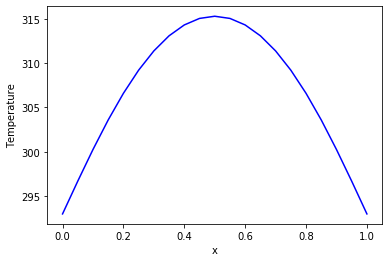

In [99]:
# plot final condition
# https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.xlabel('x')
plt.ylabel('Temperature')
plt.plot(x,T[:][int(N/2)],'b-',label='CFD Solver')
#plt.legend() 
plt.show()


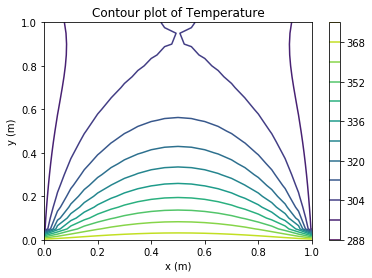

In [100]:
# contour plot
#############################
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contour.html#matplotlib.pyplot.contour

fig,ax=plt.subplots(1,1)
cp = ax.contour(X, Y, T, levels=10)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()

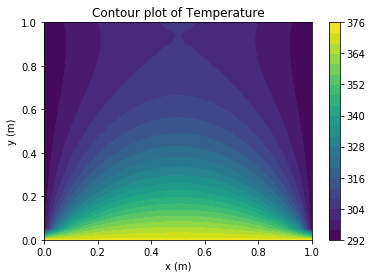

In [102]:
# contour plot
#############################
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T, levels=20)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour plot of Temperature')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')

plt.show()